In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
csv420 = "Resources/420.csv"
df420 = pd.read_csv(csv420)
df420

,Unnamed: 0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,burglary,larceny,motor_vehicle_theft,Legal Status,Medicinal,Decriminalized,Recreational,Year legalized (Rec),Medical,Year legalized (Med)
0,0,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,...,5616,15076,2501,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
1,1,1980,AK,Alaska,440142,1919,39,250.0,NaN,360,...,5545,14916,2469,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
2,2,1981,AK,Alaska,412000,2537,60,421.0,NaN,472,...,5479,16310,2845,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
3,3,1982,AK,Alaska,438000,2732,81,374.0,NaN,586,...,5204,16672,2603,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
4,4,1983,AK,Alaska,479000,2940,66,486.0,NaN,465,...,5720,17085,3084,Fully Legal,Yes,Yes,Yes,2014,Yes,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2035,2014,WY,Wyoming,584304,1142,16,127.0,174.0,53,...,1689,9185,603,Fully Illegal,No,No,No,0,No,0
2036,2036,2015,WY,Wyoming,586555,1300,16,124.0,171.0,59,...,1762,8797,592,Fully Illegal,No,No,No,0,No,0
2037,2037,2016,WY,Wyoming,584910,1431,20,152.0,206.0,59,...,1771,8889,800,Fully Illegal,No,No,No,0,No,0
2038,2038,2017,WY,Wyoming,578934,1358,14,NaN,253.0,98,...,1556,8211,761,Fully Illegal,No,No,No,0,No,0


In [60]:
#loop to populate year legal
true_legality = []

for row in df420.iterrows():
    if row[1]['Year legalized (Rec)'] == 0 and row[1]['Year legalized (Med)'] == 0:
        true_legality.append('Illegal')
    elif row[1]['year'] >= row[1]['Year legalized (Rec)'] and row[1]['Year legalized (Rec)'] != 0:
        true_legality.append('Recreational')
    elif row[1]['year'] >= row[1]['Year legalized (Med)'] and row[1]['Year legalized (Med)'] != 0:
        true_legality.append('Medical')
    else:
        true_legality.append('Illegal')


df420['Adj Legal Status'] = true_legality
df420.head()


,Unnamed: 0,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,...,larceny,motor_vehicle_theft,Legal Status,Medicinal,Decriminalized,Recreational,Year legalized (Rec),Medical,Year legalized (Med),Adj Legal Status
0,0,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,...,15076,2501,Fully Legal,Yes,Yes,Yes,2014,Yes,1998,Illegal
1,1,1980,AK,Alaska,440142,1919,39,250.0,NaN,360,...,14916,2469,Fully Legal,Yes,Yes,Yes,2014,Yes,1998,Illegal
2,2,1981,AK,Alaska,412000,2537,60,421.0,NaN,472,...,16310,2845,Fully Legal,Yes,Yes,Yes,2014,Yes,1998,Illegal
3,3,1982,AK,Alaska,438000,2732,81,374.0,NaN,586,...,16672,2603,Fully Legal,Yes,Yes,Yes,2014,Yes,1998,Illegal
4,4,1983,AK,Alaska,479000,2940,66,486.0,NaN,465,...,17085,3084,Fully Legal,Yes,Yes,Yes,2014,Yes,1998,Illegal


In [61]:
# In order to get the crime rate, for each year, take column with the crime type and divide by the stae population for that year

violent_crime_rate = df420["violent_crime"] / df420["population"]
# violent_crime_rate

property_crime_rate = df420["property_crime"] / df420["population"]
# property_crime_rate

total_crime_rate = (df420["violent_crime"] + df420["property_crime"]) / df420["population"]

In [71]:
# Compile new Dataframe with State, State Type, Year, Crime Rates, Year Legalized (rec), Year Legalized (med), decriminalized
crime_rate_df = pd.DataFrame({
    "State":df420["state_name"],  
    "Year":df420["year"],
    "Legal Status":df420["Adj Legal Status"],
    "Population":df420["population"],
    "Decriminalized":df420["Decriminalized"], 
    "Violent Crime Rate":violent_crime_rate, 
    "Property Crime Rate":property_crime_rate,
    "Total Crime Rate":total_crime_rate})


# crime_rate_df['Legal Status'] = crime_rate_df['Legal Status'].astype('string')
crime_rate_1990 = crime_rate_df.loc[crime_rate_df['Year']==1990]
crime_rate_2000 = crime_rate_df.loc[crime_rate_df['Year']==2000]
crime_rate_2010 = crime_rate_df.loc[crime_rate_df['Year']==2010]

crime_rate_df



,State,Year,Legal Status,Population,Decriminalized,Violent Crime Rate,Property Crime Rate,Total Crime Rate
0,Alaska,1979,Illegal,406000,Yes,0.004911,0.057126,0.062037
1,Alaska,1980,Illegal,440142,Yes,0.004360,0.052097,0.056457
2,Alaska,1981,Illegal,412000,Yes,0.006158,0.059791,0.065949
3,Alaska,1982,Illegal,438000,Yes,0.006237,0.055888,0.062126
4,Alaska,1983,Illegal,479000,Yes,0.006138,0.054048,0.060186
...,...,...,...,...,...,...,...,...
2035,Wyoming,2014,Illegal,584304,No,0.001954,0.019642,0.021597
2036,Wyoming,2015,Illegal,586555,No,0.002216,0.019011,0.021227
2037,Wyoming,2016,Illegal,584910,No,0.002447,0.019593,0.022039
2038,Wyoming,2017,Illegal,578934,No,0.002346,0.018185,0.020531


In [97]:

crime_df_1990 = crime_rate_df.loc[crime_rate_df['Year'] == 1990]
population_1990 = crime_df_1990.groupby(['Legal Status']).sum()

crime_df_2000 = crime_rate_df.loc[crime_rate_df['Year'] == 2000]
population_2000 = crime_df_2000.groupby(['Legal Status']).sum()

crime_df_2010 = crime_rate_df.loc[crime_rate_df['Year'] == 2010]
population_2010 = crime_df_2010.groupby(['Legal Status']).sum()

crime_df_2018 = crime_rate_df.loc[crime_rate_df['Year'] == 2018]
population_2018 = crime_df_2018.groupby(['Legal Status']).sum()


pop_summary_df = pd.DataFrame({ 
    "1990":population_1990["Population"], 
    "2000":population_2000["Population"],
    "2010":population_2010["Population"],
    "2018":population_2018["Population"]
    })

pop_summary_df2 = pop_summary_df.transpose()
pop_summary_df2

,Illegal,Medical,Recreational
1990,248709873.0,NaN,NaN
2000,228821828.0,52600078.0,NaN
2010,220428678.0,88901541.0,NaN
2018,92243919.0,154915161.0,79528421.0


Text(0, 0.5, 'Population')

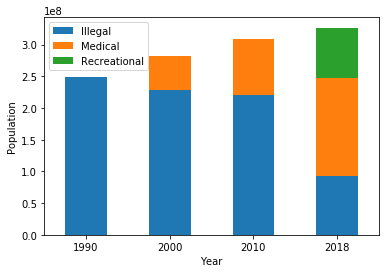

In [104]:
# #Stacked bar of populatio
axes = pop_summary_df2.plot.bar(rot=0, subplots=False, stacked=True)
axes.set_xlabel('Year')
axes.set_ylabel('Population')
